<a href="https://colab.research.google.com/github/justdelly/My-IE423-Tasks/blob/main/notebooks/n4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

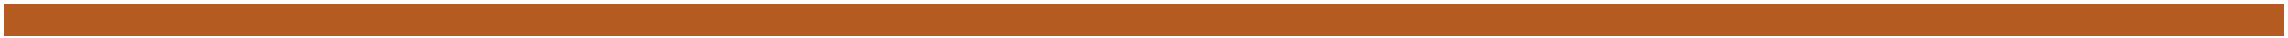

## <font color='#475468'> Bank Marketing Dataset :</font>
### <font color='#475468'>The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.

### <font color='#475468'>The classification goal is to predict if the client will subscribe a term deposit (variable y).</font>

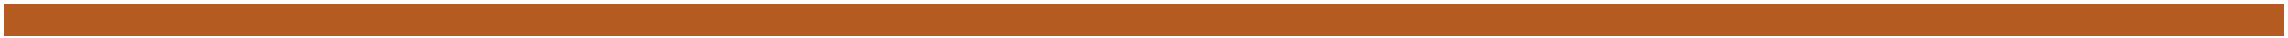

## Initialize

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Load Data

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
dfHrt = pd.read_csv('/content/drive/MyDrive/Datasets/bank_marketing_data.csv')

In [38]:
dfHrt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Analyze Data

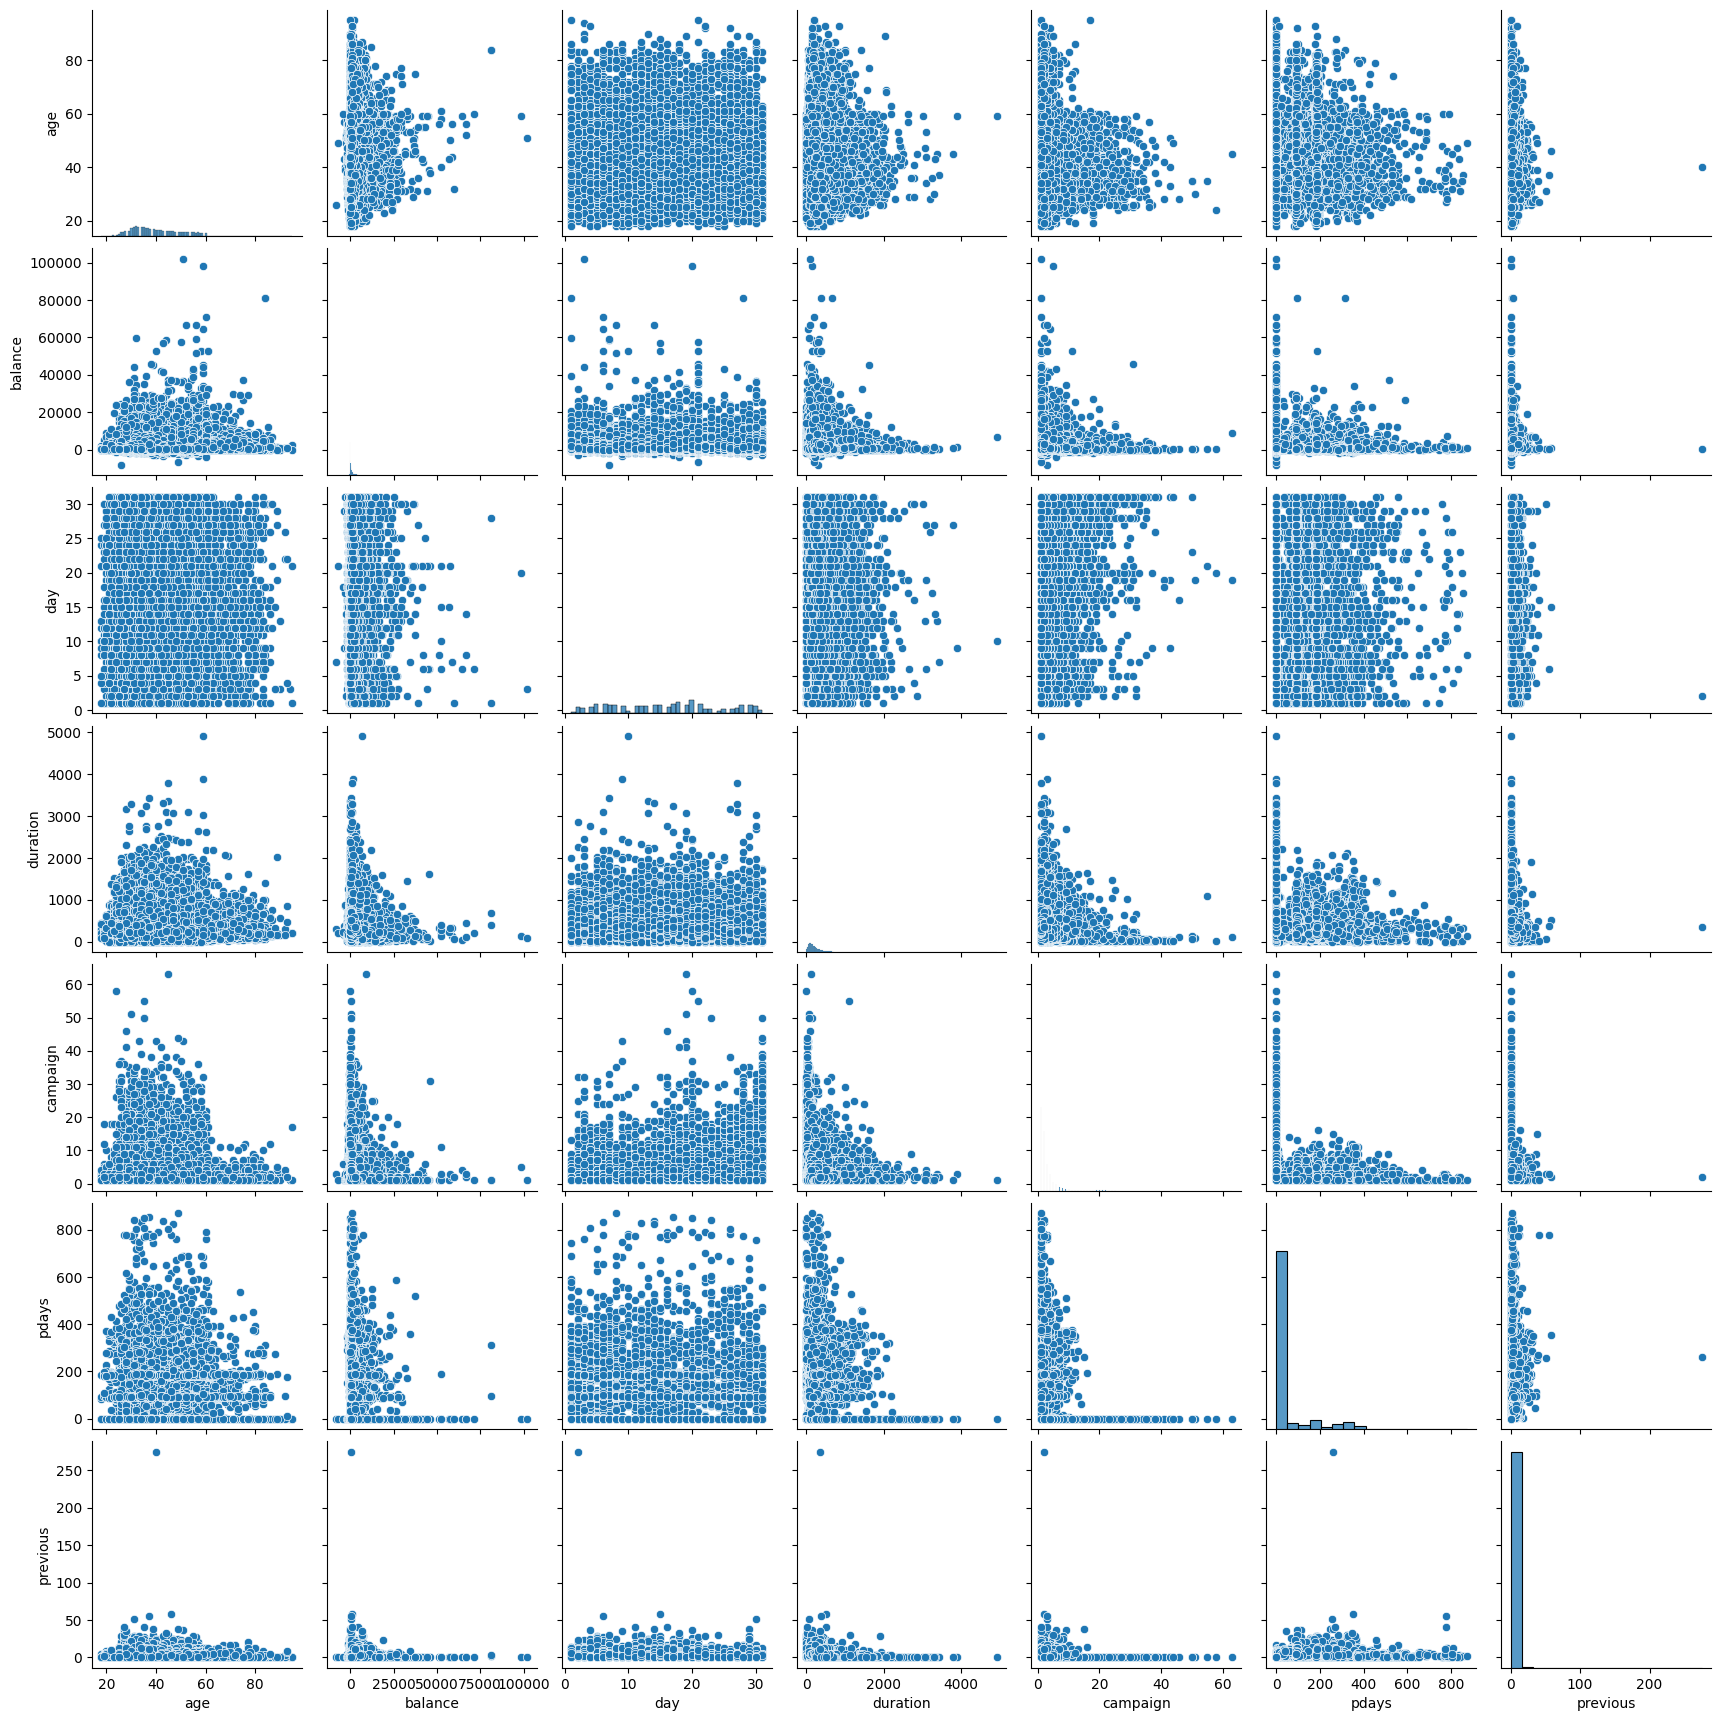

In [39]:
# Plot pair-wise relationships in the dataset
import seaborn as sns
sns.pairplot(dfHrt)

There doesn't seem to be any significant correlations going on.  Let's dig deeper into the balance by age plot...

<Axes: xlabel='age', ylabel='balance'>

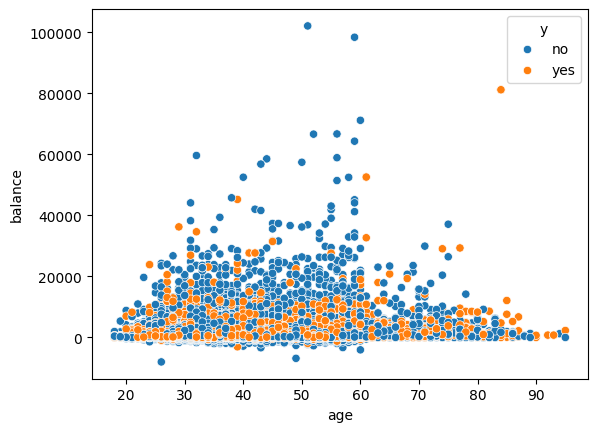

In [7]:
# 3D Scatter plot with hue
sns.scatterplot(x=dfHrt['age'], y=dfHrt['balance'], hue=dfHrt['y'])

We can't make a clear statement by looking this graph. Maybe we can just say that the answer "yes" is
slightly clustered where the balance is low.

## Predict The Decision

We will not be able to use Linear Regression because our target is binary and not continuous.  So, let's transform the linear model into something that would split the output into two 'classes'...

Such problems are known as **Classification Models**, and let's try a few different models...

### Logistic Regression

Since model doesn't take strings as inputs we converted categorical data to the numerical data and then split train and test.

In [40]:
# Scale data to eliminate the effect of feature units (especially for gradient descent cases)
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder

cols_cat = [col for col in dfHrt.columns if dfHrt[col].dtype == 'object']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in cols_cat:
    dfHrt[col] = label_encoder.fit_transform(dfHrt[col])
y = dfHrt['y']
X = scale(dfHrt.drop(['y'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=1)

In [41]:
# Build Logistic Regression model
from sklearn.linear_model import LogisticRegression


mdlLgrHrt = LogisticRegression(random_state=1)
mdlLgrHrt.fit(X_train, y_train)
y_test_pred = mdlLgrHrt.predict(X_test)

Since target is binary and not continuous, we cannot directly compare the prediction with the actual.  So, let's view the model result in a table - also known as a **Confusion Matrix**.

In [42]:
# Display model results using
from sklearn.metrics import confusion_matrix

print ('Confusion Matrix:')
print (confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[7837  156]
 [ 830  220]]


## Metric 1: F1-score
The F1-score is simply the harmonic mean of the precision and recall

In [43]:
# Display performance results
from sklearn.metrics import classification_report

print ('Classification Report (Logistic Regression):')
print (classification_report(y_test, y_test_pred))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.59      0.21      0.31      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.60      0.62      9043
weighted avg       0.87      0.89      0.87      9043



## Metric 2: ROC AUC Score

To summarize all the performance results into a single number, let's plot the
True Positive Rate (TPR) = TP / (TP + FN) = 25/31
against
False Positive Rate (FPR) = FP / (FP + TN) = 10/30

An **ROC (Receiver Operating Characteristic) curve** plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

In [44]:
# Display summary results
from sklearn.metrics import roc_auc_score

print ('AUC Score (Logistic Regression):')
print (roc_auc_score(y_test, y_test_pred))

AUC Score (Logistic Regression):
0.5950033660405235


It is 59% so the model is almost not acceptable since it would be random if it was 50%

utexas_ds_orie_divider_gray.png

### Naive Bayes
This is a different way of getting to a similar outcome. Naive Bayes is a probabilistic model that uses Bayes Theorem to predict probability of target value given features based on the probability of features given the target.

#### Naive Bayes - Gaussian
Since the pairplot showed normally distributed features (along the diagonal), the Gaussian Naive Bayes would be a good model to try...

In [50]:
# Build Naive Bayes - Gaussian model
from sklearn.naive_bayes import GaussianNB

mdlNbg = GaussianNB()
mdlNbg.fit(X_train,y_train)
y_test_pred = mdlNbg.predict(X_test)

print ('Results (Naive Bayes - Gaussian):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

Results (Naive Bayes - Gaussian):

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7993
           1       0.35      0.49      0.40      1050

    accuracy                           0.83      9043
   macro avg       0.64      0.68      0.65      9043
weighted avg       0.86      0.83      0.85      9043

AUC Score:
0.6827803494724551


This is quite better than previous. Due to the fact that Naive Bayes performed better than logistic regression we can deduct that features are not so dependent with each other.

### K-Nearest Neighbor (KNN)
This is yet another way of getting to a similar outcome, but this time using cartesian distances to determine how close or far a new data point is to the previous data points.

In [51]:
# Build KNN model with 5 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

mdlKnn = KNeighborsClassifier(n_neighbors=10)
mdlKnn.fit(X_train, y_train)
y_test_pred = mdlKnn.predict(X_test)

print ('AUC Score (K-Nearest Neighbor):')
print (roc_auc_score(y_test, y_test_pred))

AUC Score (K-Nearest Neighbor):
0.6071200395584232


Since data is not balanced it makes sense that KNN doesn't do so well.

### Support Vector Machines
While Logistic Regression and Naive Bayes are probabilistic models, Support Vector Machines try to create a boundary that maximize the margin between the different classes.

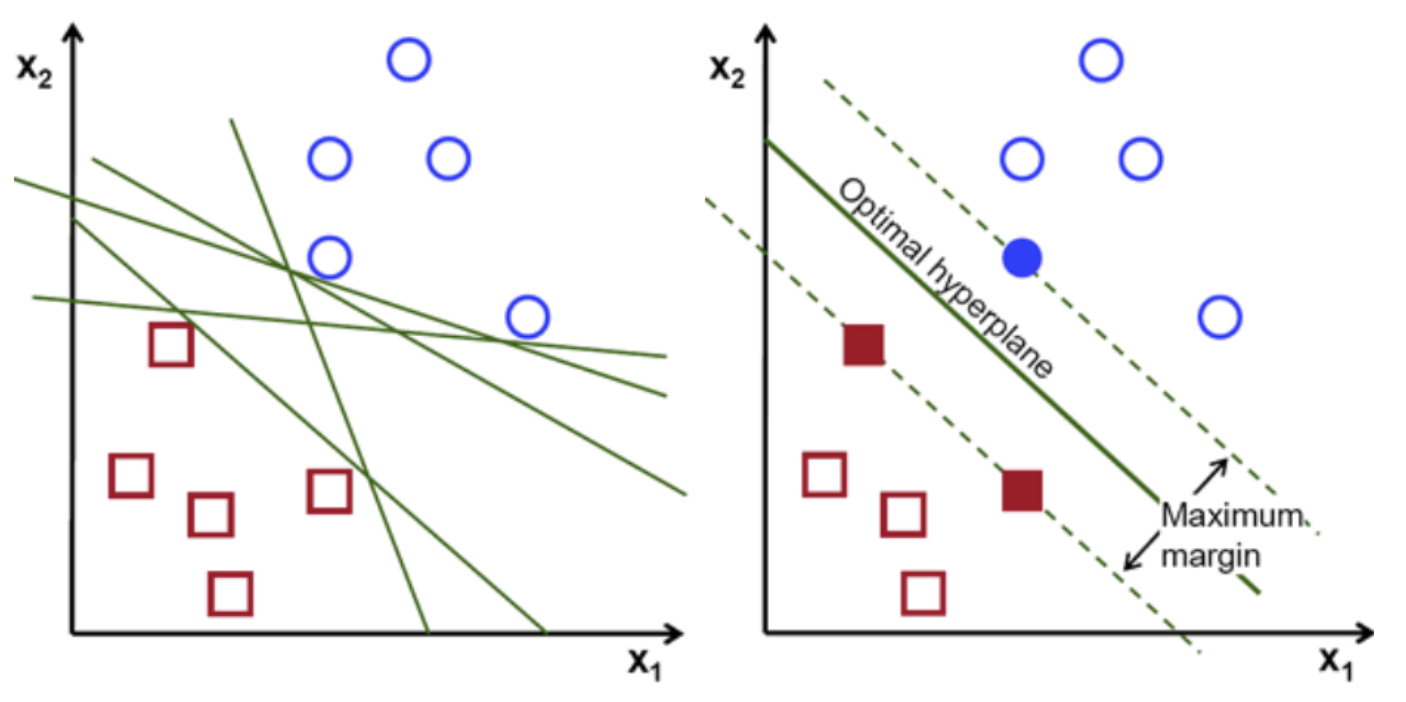

In [52]:
# Build Support Vector Machines - Classifier model

from sklearn.svm import SVC

mdlSvm = SVC()
mdlSvm.fit(X_train, y_train)
y_test_pred = mdlSvm.predict(X_test)

print ('Results (Support Vector Classifier):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

Results (Support Vector Classifier):

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7993
           1       0.67      0.27      0.38      1050

    accuracy                           0.90      9043
   macro avg       0.79      0.62      0.66      9043
weighted avg       0.88      0.90      0.88      9043

AUC Score:
0.6247007798490346


Naive Bayes is performed best amongst all models. It is probably due to the unbalanced data and features that are not so dependent with each other.


utexas_ds_orie_divider_gray.png